In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms

In [2]:
##! unzip test_images.zip

In [3]:
#need to create the train test subfolder split.

BATCH_SIZE = 32
LEARNING_RATE = 0.002
TRAIN_DATA_PATH = "subset_images/"
TEST_DATA_PATH = "test_images/"
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    ])

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=0)

test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0) 

In [4]:
classes = ('albacore','australian_herring','australian_salmon','big','bream','flathead','flounder','gurnard','snapper','yellowtail_kingfish')

In [5]:
#Image viewing

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_data_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

<Figure size 640x480 with 1 Axes>

snapper gurnard   big flathead yellowtail_kingfish flathead snapper snapper


In [6]:
#CNN architecture

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        self.BatchNorm1 = nn.BatchNorm2d(8)
        self.BatchNorm2 = nn.BatchNorm2d(16)
        self.BatchNorm3 = nn.BatchNorm2d(32)
        self.BatchNorm4 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 112 * 112, 10)
        self.Dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.BatchNorm1(F.relu(self.conv1(x)))
        x = self.Dropout(x)
        x = F.relu(self.conv2(x))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 32 * 112 * 112)
        x = self.fc1(x)

        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

In [8]:
LEARNING_RATE = 0.001

In [9]:
#for i, data in enumerate(train_data_loader, 0):
#    inputs, labels = data
#    outputs = net(inputs)
#    break

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total))

print('Finished Training')

[1,    10] loss: 0.010
[1,    20] loss: 0.006
[1,    30] loss: 0.191
[1,    40] loss: 0.036


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


[1,    50] loss: 0.008
[1,    60] loss: 0.036
Accuracy of the network on the test images: 57 %
[2,    10] loss: 0.028
[2,    20] loss: 0.014
[2,    30] loss: 0.007
[2,    40] loss: 0.141
[2,    50] loss: 0.018
[2,    60] loss: 0.018
Accuracy of the network on the test images: 61 %
[3,    10] loss: 0.122
[4,    60] loss: 0.156


KeyboardInterrupt: 

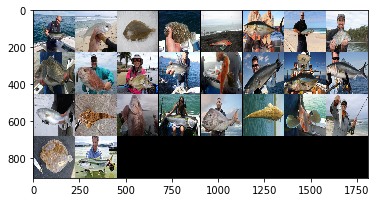

GroundTruth:  yellowtail_kingfish australian_herring flounder flounder gurnard albacore australian_salmon bream


In [12]:
dataiter = iter(test_data_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_data_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 65 %
